### 1.
- One random point
- 2D plane

In [12]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Generates random point in rectangle [xy_min; xy_max]
def generate_random_point(n=2, xy_min=[0, 0], xy_max=[10, 20]):
    data = np.random.uniform(low=xy_min, high=xy_max, size=(n,2))
    return data

# Returns directional vector
def get_vector_two_points(two_points):
    return two_points[1] - two_points[0]

In [14]:
# Generate two Random point2:
two_points = generate_random_point(n=2, xy_min=[0, 0], xy_max=[10, 20])
print(two_points)
# get vector for these two points
v = get_vector_two_points(two_points)
print(v)

[[7.91057707 0.2201996 ]
 [9.22245731 9.82290626]]
[1.31188024 9.60270665]


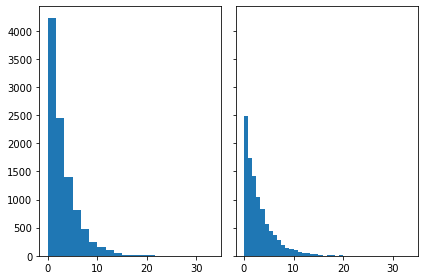

In [15]:
# JUST CHECKING how Gamma dist is look like

N_points = 100000
n_bins = 20

shape, scale = 1., 3.  # mean=4, std=2*sqrt(2)
s = np.random.gamma(shape, scale, 10000)


fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(s, bins=n_bins)
axs[1].hist(s, bins=2*n_bins)
plt.show()

In [16]:
# Generates normilized Gamma distributed value
def generate_gamma():
    shape, scale = 1., 3.
    s = np.random.gamma(shape, scale, 1)[0]
    if (s > 20): # заглушка пока что
        s = 20
    s = s / 20
    return s

In [17]:
gamma_coeff = generate_gamma()

In [18]:
# Generates new point on line between two initial points
def generate_new_point(start_point, v, gamma_coeff):
    return two_points[0] + v * gamma_coeff

In [19]:
generated_point = generate_new_point(two_points[0], v, gamma_coeff)

In [20]:
initial_points_and_generated = np.concatenate((two_points, generated_point[np.newaxis, :]), axis=0)
initial_points_and_generated

array([[7.91057707, 0.2201996 ],
       [9.22245731, 9.82290626],
       [7.9441778 , 0.46615034]])

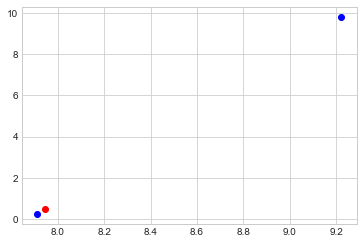

In [22]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np


initial_x, initial_y = map(list, zip(*two_points))
generated_x, generated_y = map(list, zip(*generated_point[np.newaxis, :]))

plt.plot(initial_x, initial_y, 'o', color='blue');
plt.plot(generated_x, generated_y, 'o', color='red');

## 2.
- Multiple Random points
- 2D plane

In [23]:
NUM_RAND_POINTS = 20

In [24]:
# Generate two Random point2:
two_points = generate_random_point(n=2, xy_min=[0, 0], xy_max=[10, 20])
print(two_points)
# get vector for these two points
v = get_vector_two_points(two_points)
print(v)

[[ 7.87115264  8.90168253]
 [ 0.10243592 12.73122054]]
[-7.76871672  3.82953801]


In [25]:
gamma_coeff = generate_gamma()

generated_points = generate_new_point(two_points[0], v, gamma_coeff)[np.newaxis, :]

for i in range(NUM_RAND_POINTS - 1):
    gamma_coeff = generate_gamma()
    generated_points = np.concatenate((generate_new_point(two_points[0], v, gamma_coeff)[np.newaxis, :], generated_points),
                                      axis=0)

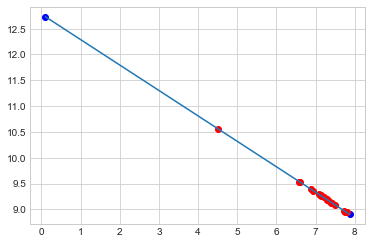

In [26]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np


initial_x, initial_y = map(list, zip(*two_points))
generated_x, generated_y = map(list, zip(*generated_points))

plt.plot(initial_x, initial_y, 'o', color='blue');
plt.plot(generated_x, generated_y, 'o', color='red');
plt.plot(initial_x, initial_y, '-');

In [27]:
generated_points

array([[ 6.87577387,  9.39234798],
       [ 7.7957861 ,  8.93883397],
       [ 7.20485408,  9.23013004],
       [ 6.59295853,  9.53175994],
       [ 7.07825351,  9.29253696],
       [ 7.72049836,  8.97594657],
       [ 7.1426867 ,  9.26077505],
       [ 6.58717356,  9.53461161],
       [ 7.78023167,  8.94650143],
       [ 4.49926287, 10.56383351],
       [ 7.49029563,  9.0894235 ],
       [ 7.28227382,  9.19196649],
       [ 7.40322447,  9.13234466],
       [ 7.32991045,  9.16848433],
       [ 7.1141419 ,  9.27484602],
       [ 7.42774676,  9.12025656],
       [ 7.12594124,  9.26902961],
       [ 7.28571584,  9.19026977],
       [ 6.93715772,  9.36208921],
       [ 7.75834373,  8.95729095]])

In [28]:
two_points

array([[ 7.87115264,  8.90168253],
       [ 0.10243592, 12.73122054]])